In [22]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Clustering Solutions
Add your code here for the clustering question

### (a)

In [23]:
#Loads the data from the CSV file as a Pandas DataFrame
df = pd.read_csv('heart_disease_raw.csv')
display(df)
display(df.describe())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [24]:
#id	and num are not useful for clustering.
#id is just a unique identifier for each row, so it doesn't contain any useful information for clustering.
#num is the target column, since it is the column we are trying to predict, so it doesn't contain any useful
# information for clustering.

### (b)

b:\Anaconda\Install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cohort Sizes:
Cluster
1    296
2    259
0    135
Name: count, dtype: int64

Cohort Centroids:
         age    trestbps        chol      thalch   oldpeak
0  57.548148  128.207556   19.659259  117.988593  0.816252
1  46.755102  126.485714  233.616463  155.628707  0.346779
2  58.551724  141.905556  256.924138  126.887663  1.694410


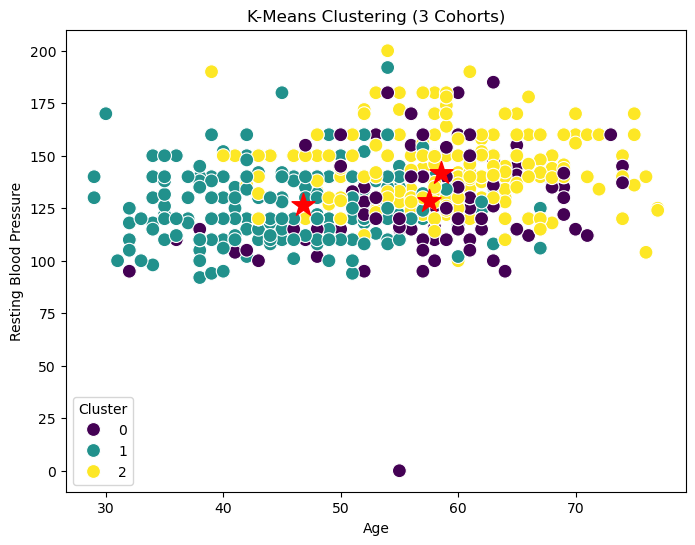

In [ ]:
import numpy as np

#Load the train dataset
data = pd.read_csv('train_dataset.csv')

#Select relevant features for clustering
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
X = data[features]

#Apply standard scaling to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply k-means clustering (3 clusters) to the scaled data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

#Add cluster labels to the original data and display the result
data['Cluster'] = kmeans.labels_

#Display the cohort sizes
cohort_sizes = data['Cluster'].value_counts()
print("Cohort Sizes:")
print(cohort_sizes)

#Display centroids of each cohort 
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("\nCohort Centroids:")
print(centroid_df)

#Answer is already finished!
#Here I am just playing with the variables to see how the function works, I know that the cluster shown here is wrong :D
#Visualize the clusters (using age and trestbps for 2D plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='trestbps', hue='Cluster', palette='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')  # Plot centroids, s is size of marker and c is color
plt.title('K-Means Clustering (3 Cohorts)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

### (c)

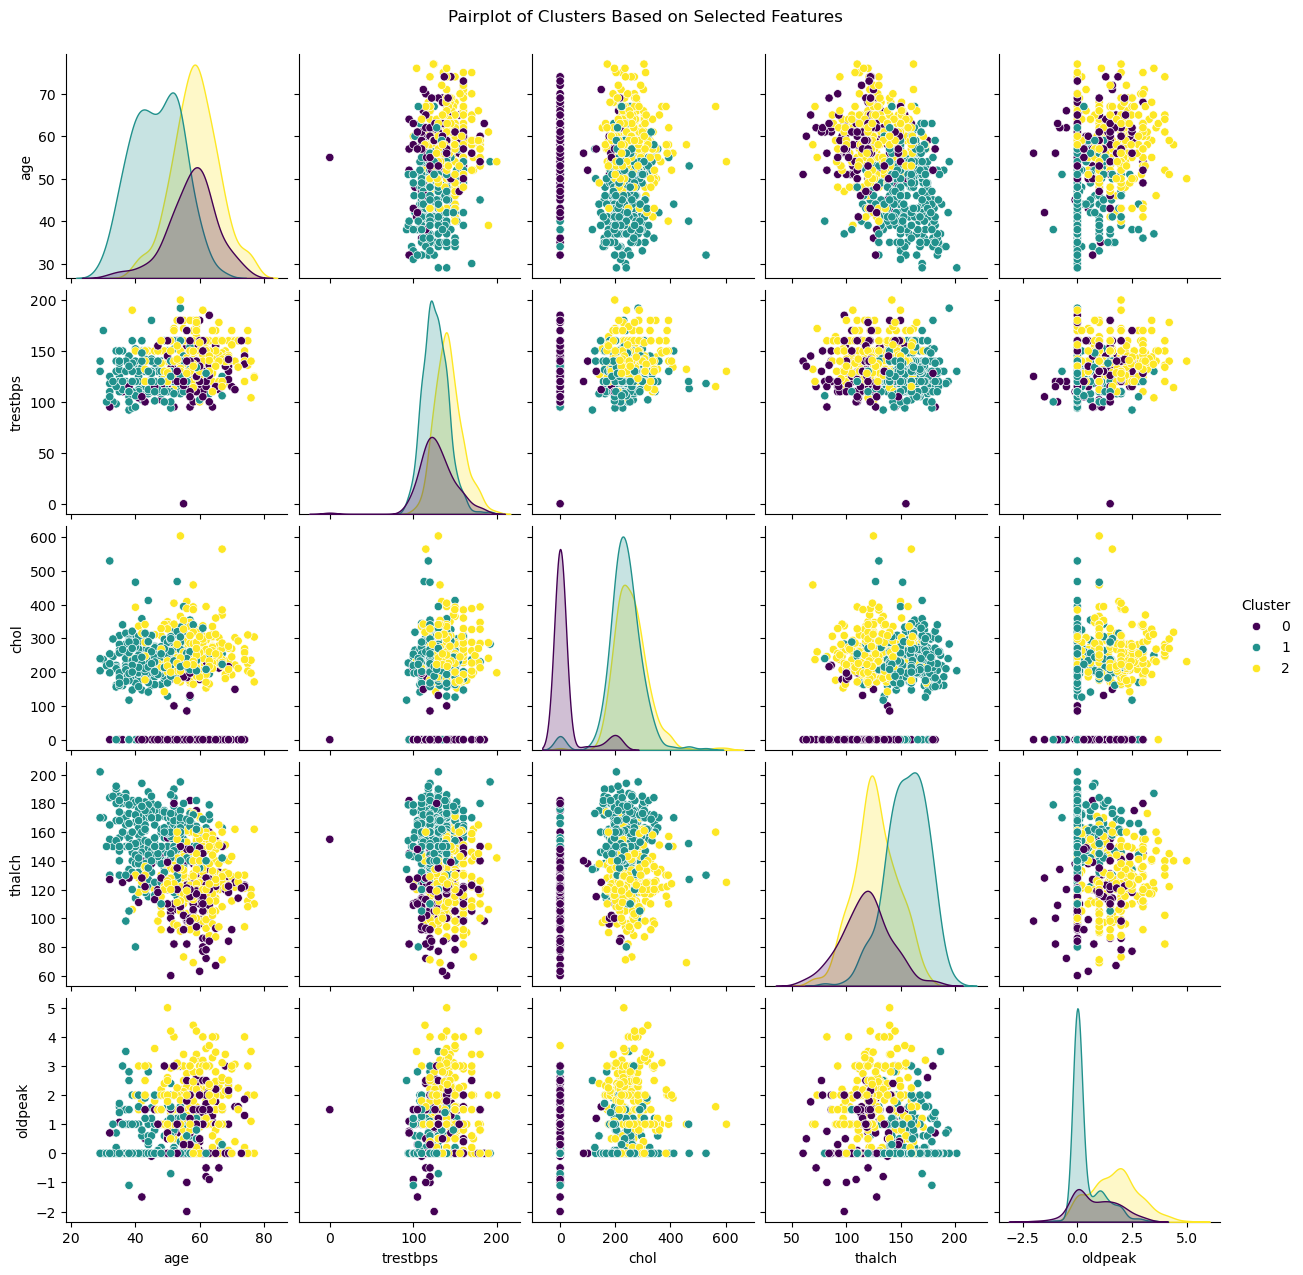

In [ ]:
#Plot the pairplot for the features colored by the cluster label
sns.pairplot(data, vars=features, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot of Clusters Based on Selected Features", y=1.02)
plt.show()

In [ ]:
#As stated in the assignment, the feature chol has a particular influence on the clustering! 
#The density of zero value in chol is very high, which is why the clustering is not working properly.
#This has led to an overemphasis of the 0 value in clustering, skewing the results.
# To reduce this influence, we can remove the rows with 0 value in chol, or we can use imputation method (for example replace the 0 value with the mean value of the column).

### (d)

In [ ]:
#import mode function from scipy.stats
from scipy.stats import mode  

#Load the training and testing datasets 
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test-dataset-oh.csv')

#Select relevant features for clustering
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

#Standardize the training and testing data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[features])
X_test_scaled = scaler.transform(test_data[features])

#Perform K-means clustering on the scaled training data, similar to the previous question
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_train_scaled)

#Getting the centroids of the clusters
centroids = kmeans.cluster_centers_

#Assign clusters to the training data and calculate the mode for each cluster based on the 'num' column
train_data['Cluster'] = kmeans.labels_
cluster_modes = train_data.groupby('Cluster')['num'].apply(lambda x: x.mode().iloc[0]).to_dict()

#Assign clusters to the testing data and predict the mode based on the closest cluster centroid
test_data['Cluster'] = kmeans.predict(X_test_scaled)
test_data['Predicted_num'] = test_data['Cluster'].apply(lambda cluster: cluster_modes.get(cluster))

#Evaluate the model: Compute confusion matrix and accuracy score
conf_matrix = confusion_matrix(test_data['num'], test_data['Predicted_num'])
accuracy = accuracy_score(test_data['num'], test_data['Predicted_num'])
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

b:\Anaconda\Install\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Confusion Matrix:
 [[11  5  0  0  0]
 [ 5 12  0  0  0]
 [ 1  4  0  0  0]
 [ 0  4  0  0  0]
 [ 0  4  0  0  0]]
Accuracy: 0.5


In [ ]:
#A proper supervised learning algorithm would consider the relationship between the features and num directly, 
# leading to more accurate predictions. So methods like decision trees, random forests, or logistic regression are 
# more suitable for this task.